# Linear regression model using sklearn's implementation.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import mean_absolute_error

In [ ]:
data = pd.read_csv("data/dataBig_300_0.csv")
data = data.drop('Unnamed: 0', axis=1)

In [13]:
data.columns

Index(['link', 'result', 'white_elo', 'black_elo', 'white_rating_diff',
       'black_rating_diff', 'eco', 'opening', 'time_control', 'termination',
       'white_cpl', 'black_cpl', 'white_moves', 'black_moves',
       'white_inaccuracies', 'white_mistakes', 'white_blunders',
       'black_inaccuracies', 'black_mistakes', 'black_blunders'],
      dtype='object')

In [3]:
data['avg_white_cpl'] = data["white_cpl"]/data["white_moves"]
data['avg_black_cpl'] = data["black_cpl"]/data["black_moves"]
data['avg_white_mistakes'] = data["white_mistakes"]/data["white_moves"]
data['avg_black_mistakes'] = data["black_mistakes"]/data["black_moves"]
data['avg_white_blunders'] = data["white_blunders"]/data["white_moves"]
data['avg_black_blunders'] = data["black_blunders"]/data["black_moves"]
data['avg_white_inaccuracies'] = data["white_inaccuracies"]/data["white_moves"]
data['avg_black_inaccuracies'] = data["black_inaccuracies"]/data["black_moves"]

In [4]:
X = data[(data['white_moves'] > 10) & (data['white_moves'] < 70)]
y = X['white_elo']
ohe = pd.get_dummies(X[['termination', 'result']], drop_first=True)
X = X[['avg_white_mistakes', 'avg_white_blunders']]
X = X.join(ohe, lsuffix='_left', rsuffix='_right')

In [5]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

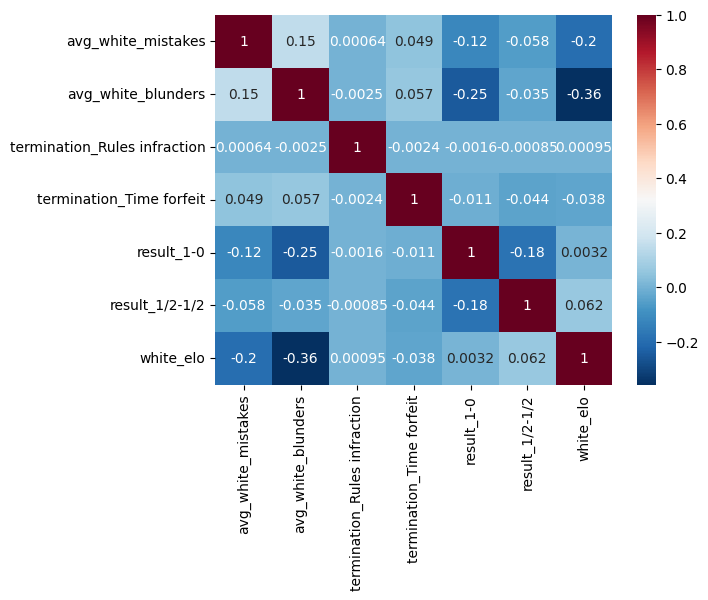

In [34]:
corr_matrix = X.join(y).corr(method='pearson')  # 'pearson' is default

sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
plt.show()

<Axes: xlabel='avg_white_blunders', ylabel='avg_white_mistakes'>

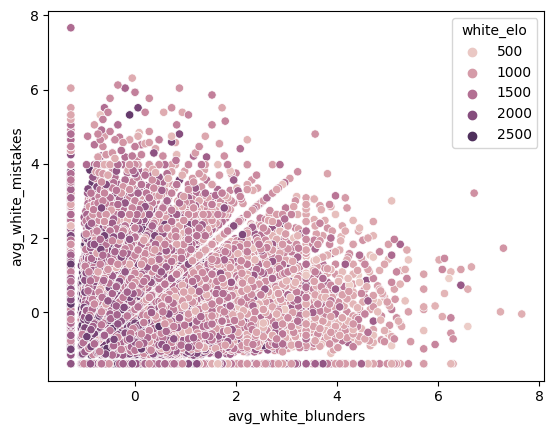

In [37]:
sns.scatterplot(data=X, x="avg_white_blunders", y="avg_white_mistakes", hue=y)
plt.show()

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

In [7]:
mlr = LinearRegression()
model=mlr.fit(x_train, y_train)
y_pred = mlr.predict(x_test)

In [57]:
print(model.score(x_test, y_test))
print(mean_absolute_error(y_test, y_pred))

0.15638165189566344
301.4610773040676


Simple linear regression model achieves 301 MSE on the test data. In the following experiments we will use different methods to see how much can be improved.